<a href="https://colab.research.google.com/github/skhazaei/TensorFlow-repo/blob/master/cats_vs_dogs_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using more sophisticated images with Convolutional Neural Networks

check [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/validation/check-your-intuition)

# Explore the Example Data

In [ ]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-02-12 18:19:01--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 108.177.125.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  58.9MB/s    in 1.1s    

2021-02-12 18:19:03 (58.9 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
ref_zip = zipfile.ZipFile(local_zip, 'r')
ref_zip.extractall('/tmp/')
ref_zip.close()

In [ ]:
ls

sample_data/


In [ ]:
import os

base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_dogs_dir = os.path.join(train_dir, 'dogs')
train_cats_dir = os.path.join(train_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')

In [ ]:
train_dogs_name = os.listdir(train_dogs_dir)
print (train_dogs_name[:5])

['dog.191.jpg', 'dog.476.jpg', 'dog.830.jpg', 'dog.859.jpg', 'dog.727.jpg']


In [ ]:
train_cats_name = os.listdir(train_cats_dir)
print (train_cats_name[:5])


['cat.672.jpg', 'cat.585.jpg', 'cat.743.jpg', 'cat.599.jpg', 'cat.516.jpg']


In [ ]:
validation_cats_name = os.listdir(validation_cats_dir)
print (validation_cats_name[:5])

['cat.2384.jpg', 'cat.2202.jpg', 'cat.2481.jpg', 'cat.2005.jpg', 'cat.2351.jpg']


In [ ]:
validation_dogs_name = os.listdir(validation_dogs_dir)
print (validation_dogs_name[:5])

['dog.2496.jpg', 'dog.2003.jpg', 'dog.2263.jpg', 'dog.2264.jpg', 'dog.2334.jpg']


In [ ]:
print ('total training dog images = {}'.format(len(train_cats_name)))
print ('total training cat images = {}'.format(len(train_cats_name)))
print ('total validation dog images = {}'.format(len(validation_dogs_name)))
print ('total validation cat images = {}'.format(len(validation_cats_name)))

total training dog images = 1000
total training cat images = 1000
total validation dog images = 500
total validation cat images = 500


For both cats and dogs, we have 1000 training images and 500 validation images

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

ncols = 4
nrows = 4

pic_index = 0

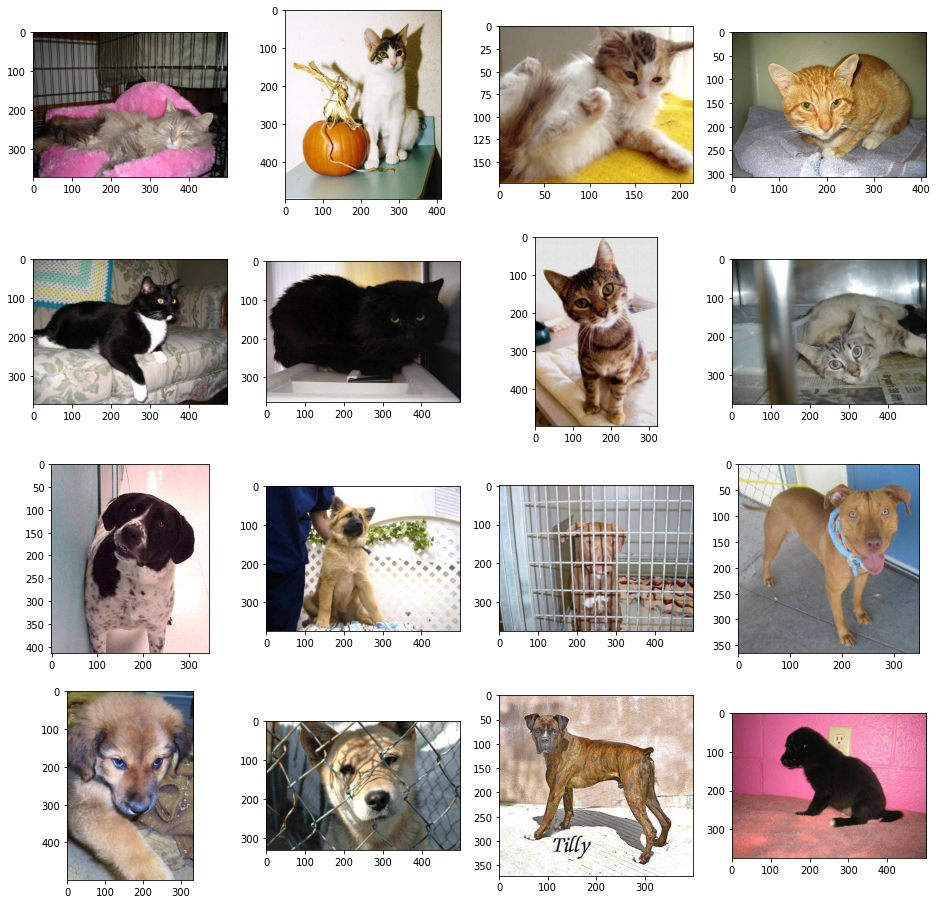

In [ ]:
fig = plt.gcf()
fig.set_size_inches(nrows*4, ncols*4)

pic_index += 8
next_cat_pic = [os.path.join(train_cats_dir, fname) for fname in train_cats_name[pic_index-8:pic_index]]
next_dog_pic = [os.path.join(train_dogs_dir, fname) for fname in train_dogs_name[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pic + next_dog_pic):
  sp = plt.subplot(nrows, ncols, i + 1)
  img = mpimg.imread(img_path)
  #sp.axis('off')

  plt.imshow(img)
plt.show()



It can be seen that the images are in a varity shapes and sizes.

# Define the model

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation=tf.nn.relu, input_shape=(150,150, 3)),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 18496)            

#Compile the model

In [ ]:
model.compile(tf.keras.optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

#Data Preprocessing

Let's set up the generators for training and validation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    batch_size=20,
    target_size=(150, 150),
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size=20,
    target_size=(150, 150),
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#Training

In [ ]:
history = model.fit_generator(
    train_generator,
    validation_data=validation_generator,
    epochs=15,
    steps_per_epoch=100,
    validation_steps=50,
    verbose=2
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
100/100 - 58s - loss: 0.7389 - accuracy: 0.5615 - val_loss: 0.7165 - val_accuracy: 0.5260
Epoch 2/15
100/100 - 57s - loss: 0.6122 - accuracy: 0.6540 - val_loss: 0.7813 - val_accuracy: 0.5940
Epoch 3/15
100/100 - 57s - loss: 0.5279 - accuracy: 0.7440 - val_loss: 0.6029 - val_accuracy: 0.6780
Epoch 4/15
100/100 - 56s - loss: 0.4404 - accuracy: 0.8005 - val_loss: 0.5567 - val_accuracy: 0.7100
Epoch 5/15
100/100 - 56s - loss: 0.3600 - accuracy: 0.8325 - val_loss: 0.5670 - val_accuracy: 0.7350
Epoch 6/15
100/100 - 57s - loss: 0.2651 - accuracy: 0.8970 - val_loss: 0.6635 - val_accuracy: 0.7220
Epoch 7/15
100/100 - 56s - loss: 0.1780 - accuracy: 0.9315 - val_loss: 0.7736 - val_accuracy: 0.7110
Epoch 8/15
100/100 - 56s - loss: 0.1248 - accuracy: 0.9540 - val_loss: 0.9774 - val_accuracy: 0.7090
Epoch 9/15
100/100 - 56s - loss: 0.0826 - accuracy: 0.9715 - val_loss: 0.9615 - val_accuracy: 0.6840
Epoch 10/15
100/100 - 57s - loss: 0.0844 - accuracy: 0.9770 - val_loss: 1.0561 - val_accura

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")

Saving cat-114782_640.jpg to cat-114782_640.jpg
Saving cat-2969932_640.jpg to cat-2969932_640.jpg
[0.]
cat-114782_640.jpg is a cat
[0.]
cat-2969932_640.jpg is a cat


### Visualizing Intermediate Representations


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


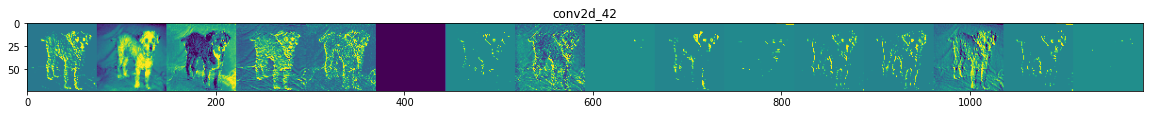

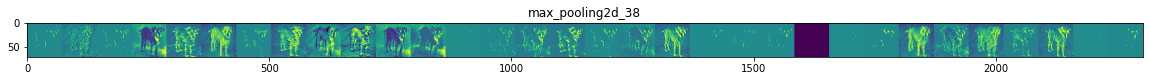

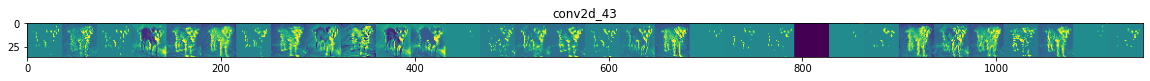

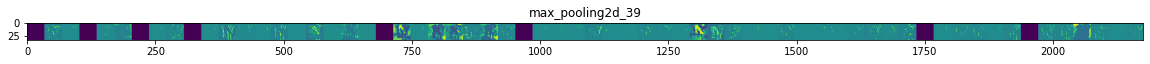

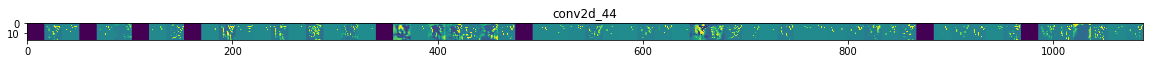

In [99]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cats_name]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dogs_name]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

### Evaluating Accuracy and Loss for the Model


Text(0.5, 1.0, 'Training and validation loss')

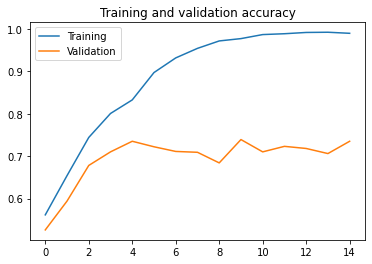

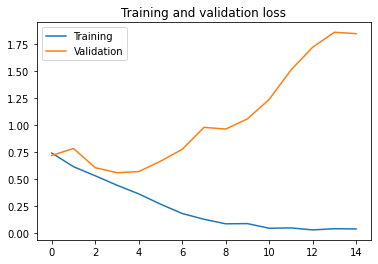

In [121]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training')
plt.plot(epochs, val_acc, label='Validation')
plt.legend()
plt.title('Training and validation accuracy')

plt.figure()
plt.plot(epochs, loss, label='Training')
plt.plot(epochs, val_loss, label='Validation')
plt.legend()
plt.title('Training and validation loss')

As you can see, we are **overfitting** like it's getting out of fashion. Our training accuracy (in blue) gets close to 100% (!) while our validation accuracy (in green) stalls as 70%. Our validation loss reaches its minimum after only five epochs.

Since we have a relatively small number of training examples (2000), overfitting should be our number one concern. Overfitting happens when a model exposed to too few examples learns patterns that do not generalize to new data, i.e. when the model starts using irrelevant features for making predictions. For instance, if you, as a human, only see three images of people who are lumberjacks, and three images of people who are sailors, and among them the only person wearing a cap is a lumberjack, you might start thinking that wearing a cap is a sign of being a lumberjack as opposed to a sailor. You would then make a pretty lousy lumberjack/sailor classifier.
